In [ ]:
#ESAME FINALE DI PYTHON - LAI_RICCARDO

In [12]:
#------------------------------------Carichiamo il dataset owid-covid-data.csv------------------------------------- 

import pandas as pd                         # serve a: importare la libreria pandas
import numpy as np  
df = pd.read_csv("owid-covid-data.csv")

import seaborn as sns

In [13]:
# Si richiede di verificare le dimensioni del dataset e i relativi metadati

# Eseguo la parte strutturale dell’EDA, per capire come è fatto il dataset.

df.shape                                    # Mostro le righe e le colonne 
df.columns                                  # Mostro i nomi delle colonne 
df.info()                                   # Mostro i tipi e valori mancanti
df.dtypes                                   # Mostro il tipo di ogni colonna 
df.isna().sum()                             # Mostro il conteggio dei valori mancanti del df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [ ]:
'''Prima di poter sviluppare le varie richieste del progetto,
   Sarebbe consigliato "perlustrare" a fondo le colonne "Continent" e "Location" per capire se le info
   al loro interno, siano siano dati puntuali oppure valori aggregati,
   così da evitare errori di interpretazione o doppi conteggi nelle analisi successive'''

In [15]:
# Conto i valori presenti per verificare se la colonna LOCATION contiene Paesi reali e Aggregati.

#Dal Df, richiedo di contare i valori presenti nella colonna Location e stampo i primi venti risultati.

df['location'].value_counts().head(20) 

location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
East Timor                       2688
Faroe Islands                    2068
Lithuania                        1684
Europe                           1684
Malaysia                         1684
World                            1684
Asia                             1684
India                            1682
Estonia                          1682
Czechia                          1682
Oceania                          1681
New Zealand                      1681
Argentina                        1678
Mexico                           1678
Italy                            1677
Name: count, dtype: int64

In [16]:
#Verifico come è distribuito il valore dei continenti, inclusi i valori mancanti NaN.

#Dal df, Conto i valori presenti nella colonna CONTINENT e stampo anche i valori mancanti tramite Dropna.
#Se non avessi utilizzato Dropna, avrebbe escluso automaticamente i NAN.

df['continent'].value_counts(dropna=False)

continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
NaN              26525
South America    23440
Name: count, dtype: int64

In [17]:
#Separo i Paesi reali dagli Aggregati per poter eseguire delle analisi piu affidabili e mirate piu avanti.

#Creo il nuovo DF_PAESI frutto dell'eliminazione di tutti i valori NaN prendendo in considerazione 
#solo la colonna CONTINENT.

df_Paesi = df.dropna(subset=["continent"])
df_Paesi


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


In [18]:
#Verifico come è distribuito il nuovo Df_Paesi considerando la colonna CONTINENT.

df_Paesi['continent'].value_counts(dropna=False)


continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

In [19]:
#Stampo i due Dataframe per notare le differenze aggiornate.

print("DIMENSIONI df Originario con valori NaN compresi:")
df.shape 

DIMENSIONI df Originario con valori NaN compresi:


(429435, 67)

In [20]:
print("DIMENSIONI del nuovo df df_Paesi:")
df_Paesi.shape

DIMENSIONI del nuovo df df_Paesi:


(402910, 67)

In [21]:
#Analizzo nuovamente la colonna LOCATION per assicurarmi della nuova distribuzione di valori, stampando 20 righe.
#--(Europe, World ecc..) Non vengono piu evidenziati.

df_Paesi['location'].value_counts().head(20) 

location
East Timor        2688
Faroe Islands     2068
Lithuania         1684
Malaysia          1684
India             1682
Czechia           1682
Estonia           1682
New Zealand       1681
Mexico            1678
Argentina         1678
Italy             1677
Thailand          1675
Australia         1674
Angola            1674
Austria           1674
Algeria           1674
American Samoa    1674
Armenia           1674
Aruba             1674
Belgium           1674
Name: count, dtype: int64

In [22]:
#Per capire meglio la differenza tra NEW_CASES e TOTAL_CASES cerco di visualizzare un anteprima dei valori
#presenti nelle due colonne, FOCALIZZANDOMI sul paese principale in cui è nata l'epidemia.

#Dal Df prendo solo le righe della China, 
#mostrando solo le colonne NEW CASES e TOTAL CASES stampando solo le prime 20 righe.

df[df['location'] == 'China'][['location','new_cases', 'total_cases']].head(20)

#CONCLUSIONE - I valori di NEW_CASES avanzano in modo giornaliero , 
#              mentre i valori di TOTAL_CASES sono valori cumulativi.

,location,new_cases,total_cases
73670,China,1.0,1.0
73671,China,0.0,1.0
73672,China,0.0,1.0
73673,China,0.0,1.0
73674,China,0.0,1.0
73675,China,0.0,1.0
73676,China,0.0,1.0
73677,China,44.0,45.0
73678,China,0.0,45.0
73679,China,0.0,45.0


In [23]:
#Converto la colonna DATE da stringa a valore numerico.

df['date'] = pd.to_datetime(df['date'])  # converto la colonna in datetime

In [37]:
#2) 

'''Si chiede di trovare, per ogni continente: 
a. il numero di casi fin dall'inizio della pandemia 
b. la percentuale rispetto al totale mondiale del numero di casi'''

"Si chiede di trovare, per ogni continente: \na. il numero di casi fin dall'inizio della pandemia \nb. la percentuale rispetto al totale mondiale del numero di casi"

In [25]:
#A) 
#Per rispondere al punto A, dal Df chiedo di raggruppare per la colonna CONTINENT dopo aver sommato tutti i valori di NEW CASES.

print("TOT CASI PER CONTINENTE:")
Tot_continenti = df.groupby("continent")["new_cases"].sum()
print(Tot_continenti)

TOT CASI PER CONTINENTE:
continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64


In [26]:
#B)
#Per rispondere al punto B, dal Df dovrò ottenere per poi dividere i TOT CASI PER CONTINENTE col TOT MONDIALE e moltiplicare per 100 per ottenere una percentuale.

print("TOT MONDIALE")
Tot_mondiale = df['new_cases'].sum()
print(Tot_mondiale)

TOT MONDIALE
3288392333.0


In [27]:
print("PERCENTUALE:")
Percentuale = ((Tot_continenti / Tot_mondiale) * 100).round(2)
print(Percentuale)

PERCENTUALE:
continent
Africa           0.40
Asia             9.17
Europe           7.69
North America    3.79
Oceania          0.46
South America    2.09
Name: new_cases, dtype: float64


In [28]:
#3)

'''Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, 
filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 
a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 
b. il numero di nuovi casi rispetto alla data'''


"Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, \nfiltrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: \na. l'evoluzione del casi totali dall'inizio alla fine dell'anno \nb. il numero di nuovi casi rispetto alla data"

<Axes: title={'center': 'Casi totali in Italia nel 2022'}, xlabel='date'>

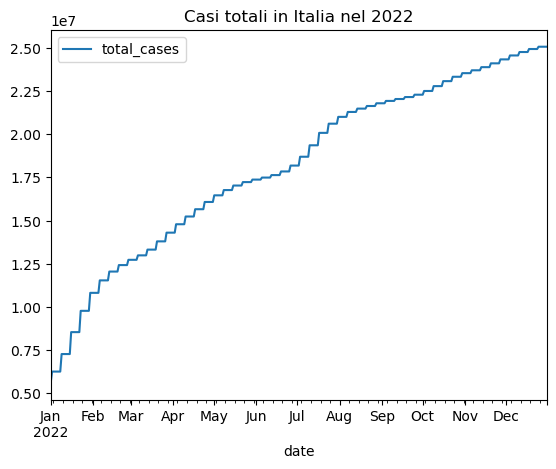

In [35]:
#A)
#Per rispondere al punto A, filtro tutte le righe contenenti ITALY dentro LOCATION, l'anno dalla colonna data convertita in DATETIME, 
#per poi eliminare tutti i valori NaN dalla colonna NEW CASES e visualizzare in un grafico l'evoluzione dei casi totali dall'inizio alla fine dell'anno. 

# Estraggo tutte le righe contenenti "Italy" nella colonna "location"
Italia = df[df["location"] == "Italy"]

# Estraggo solo l'anno 2022 dalla colonna "date"
Italia_2022 = Italia[Italia["date"].dt.year == 2022]

# Elimino tutti i valori NaN dalla colonna "new_cases"
ITALIA_RIPULITA = Italia_2022.dropna(subset=["new_cases"])

# Visualizzo il grafico attribuendo i titoli per X e Y
ITALIA_RIPULITA.plot(x="date", y="total_cases", title="Casi totali in Italia nel 2022")


<Axes: title={'center': 'NUOVI CASI IN ITALIA NEL 2022'}, xlabel='date'>

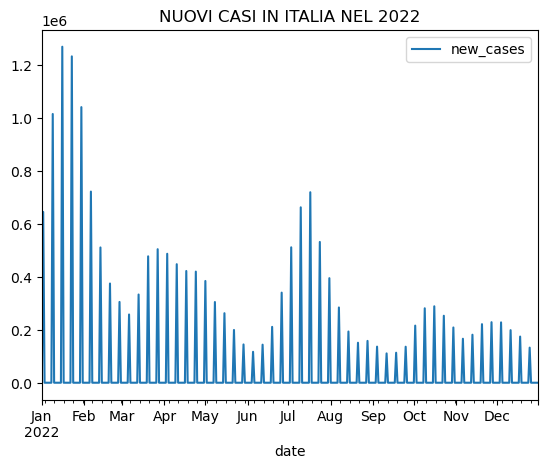

In [36]:
#B)
#Visualizzo in un grafico il numero di nuovi casi rispetto alla data.

ITALIA_RIPULITA.plot(x="date",y="new_cases",title="NUOVI CASI IN ITALIA NEL 2022")

In [ ]:
#4) 
'''Riguardo le nazioni di Italia, Germania e Francia: 
a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva 
(Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso) 
b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante'''



<Axes: xlabel='location', ylabel='icu_patients'>

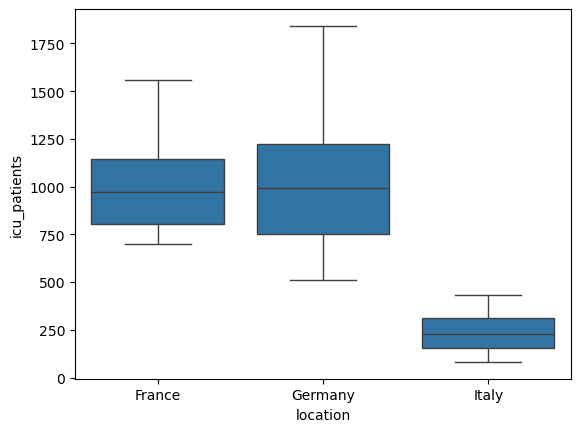

In [45]:
#A)

#Dal df filtro Italy, Germany, France all’interno della colonna location (Filtro Nazioni)
df[(df["location"] == "Italy") | (df["location"] == "Germany") | (df["location"] == "France")]

#Tengo le righe in cui date è ≥ 1 maggio 2022 e ≤ 30 aprile 2023 (Filtro date)
df[(df["date"] >= "2022-05-01") & (df["date"] <= "2023-04-30")]

#Dal df filtro Italy, Germany, France… e tengo solo le righe in cui la data è maggiore o uguale al 1 maggio 2022 e minore o uguale al 30 aprile 2023.

Andamento_Nazioni_prognosi_riservata_22_23 = df[
((df["location"] == "Italy") | 
  (df["location"] == "Germany") | 
  (df["location"] == "France")) 
& ((df["date"] >= "2022-05-01") & (df["date"] <= "2023-04-30"))]

#Rimuovo i NaN dalla colonna ICU PATIENTS poiché la loro presenza impedirebbe il calcolo corretto dei valori nel boxplot


Andamento_Nazioni_prognosi_riservata_22_23 = Andamento_Nazioni_prognosi_riservata_22_23.dropna(subset=["icu_patients"])


#Visualizzo il grafico BLOXPOT in cui si rappresentano la differenze tra nazioni riguardo il numero di pazienti in terapia intensiva. 


sns.boxplot(x="location",y="icu_patients",data=Andamento_Nazioni_prognosi_riservata_22_23)

#B)

#Dal boxplot possiamo osservare che Germania e Francia presentano valori di pazienti in terapia intensiva molto più elevati rispetto all’Italia nel periodo considerato.



In [ ]:
#5) 

'''Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: 
a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients) 
b. se ci sono dati nulli, 
con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno'''

In [49]:
#Dal df, filtro Italy, Germany, France, Spain all’interno della colonna location (Filtro Nazioni)

Filtro_Nazioni = df[(df["location"] == "Italy") | (df["location"] == "Germany") | (df["location"] == "France") | (df["location"] == "Spain")]
Filtro_Nazioni

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130367,FRA,Europe,France,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,35.6,NaN,5.98,82.66,0.9,67813000,-1002.2,-7.29,-7.29,-15.54
130368,FRA,Europe,France,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,35.6,NaN,5.98,82.66,0.9,67813000,NaN,NaN,NaN,NaN
130369,FRA,Europe,France,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,35.6,NaN,5.98,82.66,0.9,67813000,NaN,NaN,NaN,NaN
130370,FRA,Europe,France,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,35.6,NaN,5.98,82.66,0.9,67813000,NaN,NaN,NaN,NaN
130371,FRA,Europe,France,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,35.6,NaN,5.98,82.66,0.9,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364255,ESP,Europe,Spain,2024-07-31,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.9,47558632,NaN,NaN,NaN,NaN
364256,ESP,Europe,Spain,2024-08-01,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.9,47558632,NaN,NaN,NaN,NaN
364257,ESP,Europe,Spain,2024-08-02,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.9,47558632,NaN,NaN,NaN,NaN
364258,ESP,Europe,Spain,2024-08-03,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.9,47558632,NaN,NaN,NaN,NaN


In [50]:
#Tengo le righe in cui date comprende solo l'anno 2021 

Filtro_2021 = df[(df["date"] >= "2021-01-01") & (df["date"] <= "2021-12-31")]
Filtro_2021

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
362,AFG,Asia,Afghanistan,2021-01-01,51848.0,0.0,187.43,2158.0,0.0,14.86,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
363,AFG,Asia,Afghanistan,2021-01-02,51848.0,0.0,187.43,2158.0,0.0,14.86,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
364,AFG,Asia,Afghanistan,2021-01-03,52709.0,861.0,123.00,2221.0,63.0,9.00,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
365,AFG,Asia,Afghanistan,2021-01-04,52709.0,0.0,123.00,2221.0,0.0,9.00,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
366,AFG,Asia,Afghanistan,2021-01-05,52709.0,0.0,123.00,2221.0,0.0,9.00,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428483,ZWE,Africa,Zimbabwe,2021-12-27,203746.0,0.0,1724.71,4885.0,0.0,14.71,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
428484,ZWE,Africa,Zimbabwe,2021-12-28,203746.0,0.0,1724.71,4885.0,0.0,14.71,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
428485,ZWE,Africa,Zimbabwe,2021-12-29,203746.0,0.0,1724.71,4885.0,0.0,14.71,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
428486,ZWE,Africa,Zimbabwe,2021-12-30,203746.0,0.0,1724.71,4885.0,0.0,14.71,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


In [51]:
#Sommo i pazienti ospedalizzati HOSP PATIENTS raggruppando per le nazioni filtrate precedentemente.

Somma_pazienti_ospedalizzati = Filtro_Nazioni.groupby("location")["hosp_patients"].sum()
Somma_pazienti_ospedalizzati


location
France     19367212.0
Germany           0.0
Italy      13481707.0
Spain       6472838.0
Name: hosp_patients, dtype: float64

In [53]:
#Dopo aver stampato, noto che i valori sommati per la GERMANIA sono uguali a 0 rispetto all'anno 2021.

#Cerco di perlustrare la colonna HOSP_PATIENTS della GERMANIA per capire meglio i dati.

print(Filtro_Nazioni[Filtro_Nazioni["location"] == "Germany"]["hosp_patients"])

140411   NaN
140412   NaN
140413   NaN
140414   NaN
140415   NaN
          ..
142080   NaN
142081   NaN
142082   NaN
142083   NaN
142084   NaN
Name: hosp_patients, Length: 1674, dtype: float64


In [ ]:
#Dopo l'analisi, penso sia conclusivo sostenere che, 
#in assenza di dati sensati per la Germania, non sia opportuno sostituire i valori nulli. 
#Si può dedurre chiaramente che la somma dei pazienti per la Germania risulta zero a causa della mancanza di dati.” 